In [11]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import wbgapi as wbg

In [13]:
from pygooglenews import GoogleNews

In [14]:
def get_news_dataframe(query, max_articles=100):
    # Initialize GoogleNews API
    gn = GoogleNews(lang='en', country='US')

    # Search for news articles
    search_results = gn.search(query)
    
    # Extract articles
    articles = []
    for entry in search_results['entries'][:max_articles]:
        title = entry.get("title", "N/A")
        link = entry.get("link", "N/A")
        published = entry.get("published", "N/A")
        source = entry.get("source", {}).get("title", "Unknown")
        
        # Extract topic and subtopic from categories (if available)
        topics = entry.get("tags", [])
        main_topic = topics[0]["term"] if topics else "General"
        sub_topic = topics[1]["term"] if len(topics) > 1 else "N/A"

        articles.append({
            "Title": title,
            "Link": link,
            "Published": published,
            "Source": source,
            "Topic": main_topic,
            "Subtopic": sub_topic
        })

    # Convert to DataFrame
    df = pd.DataFrame(articles)
    return df

In [15]:
query = "Apple"
news_df = get_news_dataframe(query)
news_df

,Title,Link,Published,Source,Topic,Subtopic
0,"Alibaba to partner with Apple on AI features, ...",https://news.google.com/rss/articles/CBMi1AFBV...,"Thu, 13 Feb 2025 09:21:10 GMT",Reuters,General,N/A
1,Apple TV App (Finally) Launches on Android - V...,https://news.google.com/rss/articles/CBMigwFBV...,"Wed, 12 Feb 2025 20:00:00 GMT",Variety,General,N/A
2,Apple TV+ App to Be Offered for Android Device...,https://news.google.com/rss/articles/CBMiiAFBV...,"Thu, 13 Feb 2025 08:02:27 GMT",PYMNTS.com,General,N/A
3,Apple to Bring TV+ to Android Phones in Bid to...,https://news.google.com/rss/articles/CBMitAFBV...,"Wed, 12 Feb 2025 21:31:14 GMT",Bloomberg,General,N/A
4,"No, Apple Intelligence Is Not Intercepting You...",https://news.google.com/rss/articles/CBMisgFBV...,"Thu, 13 Feb 2025 13:58:00 GMT",CNET,General,N/A
...,...,...,...,...,...,...
95,Apple Completes Pixelmator Acquisition - MacRu...,https://news.google.com/rss/articles/CBMiggFBV...,"Tue, 11 Feb 2025 17:34:03 GMT",MacRumors,General,N/A
96,Apple Now Lets You Move Digital Purchases From...,https://news.google.com/rss/articles/CBMigAFBV...,"Tue, 11 Feb 2025 23:56:10 GMT",MacRumors,General,N/A
97,Germany investigates Apple’s App Tracking Tran...,https://news.google.com/rss/articles/CBMihgFBV...,"Thu, 13 Feb 2025 15:24:04 GMT",Dig Watch Updates,General,N/A
98,Prediction: Warren Buffett and Berkshire Hatha...,https://news.google.com/rss/articles/CBMimAFBV...,"Wed, 12 Feb 2025 12:22:00 GMT",The Motley Fool,General,N/A


In [16]:
GDP = 'NY.GDP.MKTP.KD'       # GDP in constant 2015 $US
GDPPC = 'NY.GDP.PCAP.KD'     # GDP per capita in constant 2015 $US
CPI = 'FP.CPI.TOTL.ZG'       # Inflation rate
interest = "FR.INR.RINR"     # interest rate
unemployment = "SL.UEM.TOTL.ZS" # Unemployment rate

Table_1 = wbg.data.DataFrame([GDP, GDPPC, CPI, interest,unemployment], 'USA', time=range(2015, 2025), numericTimeKeys=True, labels=True, columns='series')
Table_1 = pd.DataFrame(Table_1)

In [ ]:
Table_1.rename(columns = {'NY.GDP.MKTP.KD' : 'GDP', 'NY.GDP.PCAP.KD' : 'GDPPC', 'FP.CPI.TOTL.ZG' : 'CPI', 'BX.KLT.DINV.WD.GD.ZS' : 'FDI', 'FR.INR.RINR' : 'Interest rate', 'SL.UEM.TOTL.ZS' : 'Unemployment rate'}, inplace = True)
Table_1 = Table_1.sort_values(by = ['Time'], ascending = True)
Table_1 = Table_1.reset_index()
Table_1

,time,Time,CPI,Interest rate,GDP,GDPPC,Unemployment rate
0,2015,2015,0.118627,2.310515,1.829502e+13,57040.208214,5.280
1,2016,2016,1.261583,2.537232,1.862789e+13,57658.670883,4.869
2,2017,2017,2.130110,2.265296,1.908569e+13,58703.144078,4.355
3,2018,2018,2.442583,2.554750,1.965187e+13,60127.210276,3.896
4,2019,2019,1.812210,3.573062,2.015964e+13,61400.548154,3.669
5,2020,2020,1.233584,2.186282,1.972358e+13,59493.145982,8.055
6,2021,2021,4.697859,-1.258522,2.091785e+13,62996.289384,5.349
7,2022,2022,8.002800,NaN,2.144339e+13,64342.117938,3.650
8,2023,2023,4.116338,NaN,2.206258e+13,65875.177881,3.638


In [18]:
from datetime import datetime
end = datetime.now()
start = datetime(year=end.year-10, month=end.month, day=end.day)

In [ ]:
stock_data = yf.download(tickers='AAPL',start=start,end=end)
stock_data = stock_data.reset_index()
stock_data.columns = [col[0].lower() for col in stock_data.columns] # finta does not support tuple input
stock_data.info()

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2516 non-null   datetime64[ns]
 1   close   2516 non-null   float64       
 2   high    2516 non-null   float64       
 3   low     2516 non-null   float64       
 4   open    2516 non-null   float64       
 5   volume  2516 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB


In [37]:
stock_data

,date,close,high,low,open,volume
0,2015-02-13,28.380480,28.425145,28.061121,28.425145,217088800
1,2015-02-17,28.547972,28.782466,28.344743,28.472039,252609600
2,2015-02-18,28.746737,28.760136,28.463109,28.503308,179566800
3,2015-02-19,28.686443,28.815974,28.659645,28.693143,149449600
4,2015-02-20,28.920933,28.920933,28.597108,28.724403,195793600
...,...,...,...,...,...,...
2511,2025-02-07,227.380005,233.743004,227.010401,232.344548,39707200
2512,2025-02-10,227.649994,230.589996,227.199997,229.570007,33115600
2513,2025-02-11,232.619995,235.229996,228.130005,228.199997,53718400
2514,2025-02-12,236.869995,236.960007,230.679993,231.199997,45201200


In [34]:
from finta import TA

In [43]:
stock_data["SMA_20"] = TA.SMA(stock_data, period=20) # simple moving average for 20 days
stock_data["EMA_20"] = TA.EMA(stock_data, period=20) # exponential moving avg for 20 days
stock_data["ADX"] = TA.ADX(stock_data) # average directional index

In [44]:
macd = TA.MACD(stock_data)
stock_data["MACD"] = macd["MACD"]
stock_data["MACD_signal"] = macd["SIGNAL"]

In [45]:
bb = TA.BBANDS(stock_data)
stock_data["BB_upper"] = bb["BB_UPPER"]
stock_data["BB_middle"] = bb["BB_MIDDLE"]
stock_data["BB_lower"] = bb["BB_LOWER"]

In [46]:
stock_data["RSI"] = TA.RSI(stock_data)
stock_data["Stoch_%K"] = TA.STOCH(stock_data)
stock_data["Stoch_%D"] = TA.STOCHD(stock_data)
stock_data["Williams_%R"] = TA.WILLIAMS(stock_data)
stock_data["Williams_%R"] = TA.WILLIAMS(stock_data)
stock_data["CCI"] = TA.CCI(stock_data)

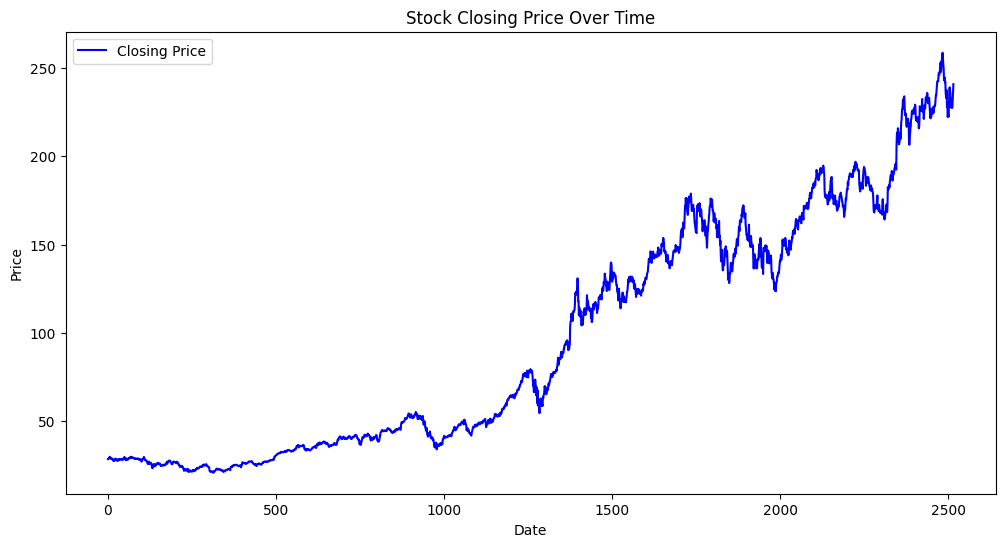

In [56]:
# closing price over time
plt.figure(figsize=(12,6))
plt.plot(stock_data.index, stock_data["close"], label="Closing Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Closing Price Over Time")
plt.legend()
plt.show()

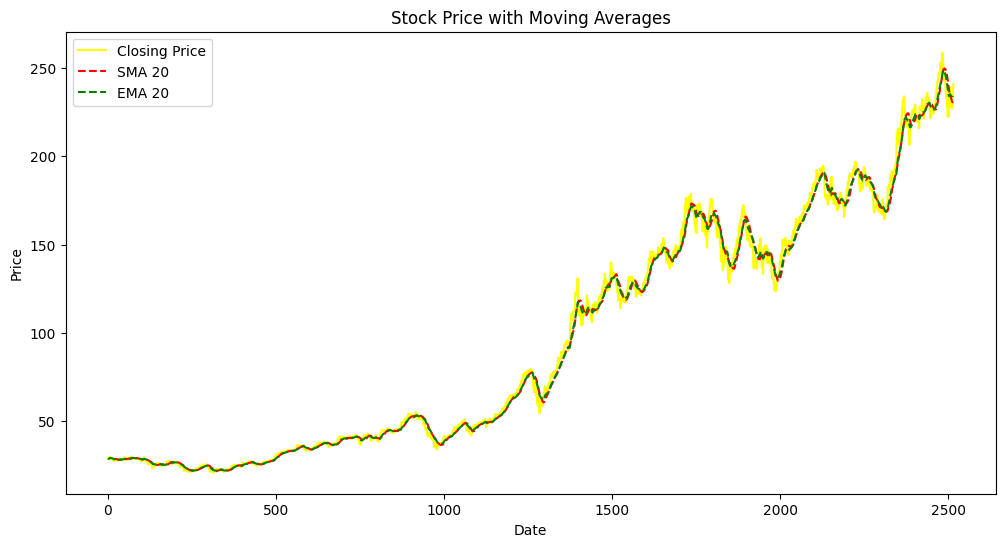

In [57]:
# moving averages
plt.figure(figsize=(12,6))
plt.plot(stock_data.index, stock_data["close"], label="Closing Price", color='yellow')
plt.plot(stock_data.index, stock_data["SMA_20"], label="SMA 20", linestyle="dashed", color='red')
plt.plot(stock_data.index, stock_data["EMA_20"], label="EMA 20", linestyle="dashed", color='green')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Price with Moving Averages")
plt.legend()
plt.show()

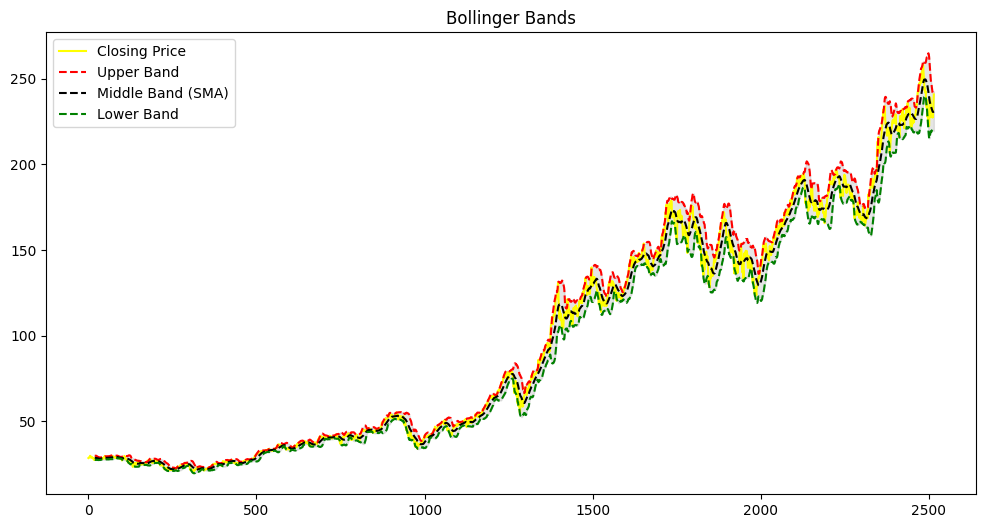

In [58]:
# bollinger bands
plt.figure(figsize=(12,6))
plt.plot(stock_data.index, stock_data["close"], label="Closing Price", color='yellow')
plt.plot(stock_data.index, stock_data["BB_upper"], label="Upper Band", linestyle="dashed", color='red')
plt.plot(stock_data.index, stock_data["BB_middle"], label="Middle Band (SMA)", linestyle="dashed", color='black')
plt.plot(stock_data.index, stock_data["BB_lower"], label="Lower Band", linestyle="dashed", color='green')
plt.fill_between(stock_data.index, stock_data["BB_upper"], stock_data["BB_lower"], color='gray', alpha=0.2)
plt.title("Bollinger Bands")
plt.legend()
plt.show()

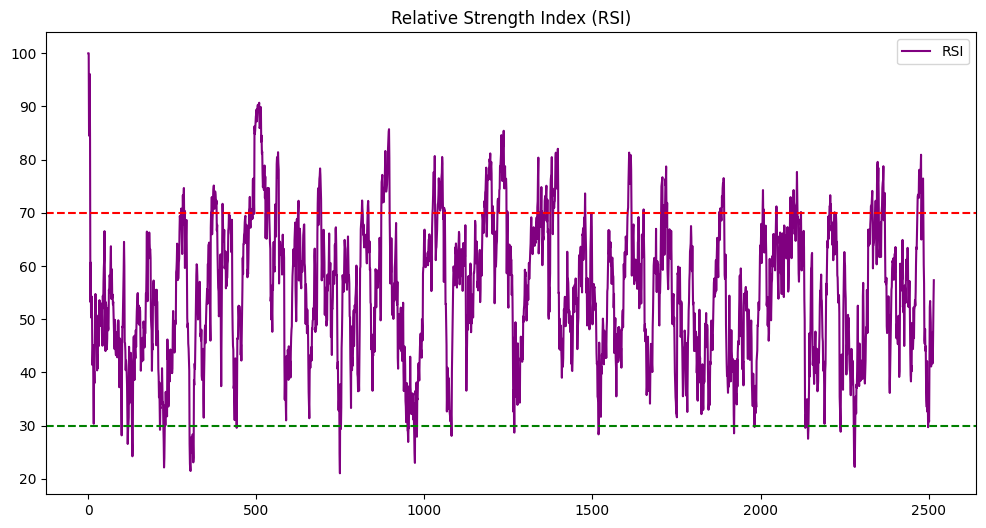

In [59]:
# relative strength index
plt.figure(figsize=(12,6))
plt.plot(stock_data.index, stock_data["RSI"], label="RSI", color='purple')
plt.axhline(70, linestyle='dashed', color='red')  # Overbought
plt.axhline(30, linestyle='dashed', color='green')  # Oversold
plt.title("Relative Strength Index (RSI)")
plt.legend()
plt.show()

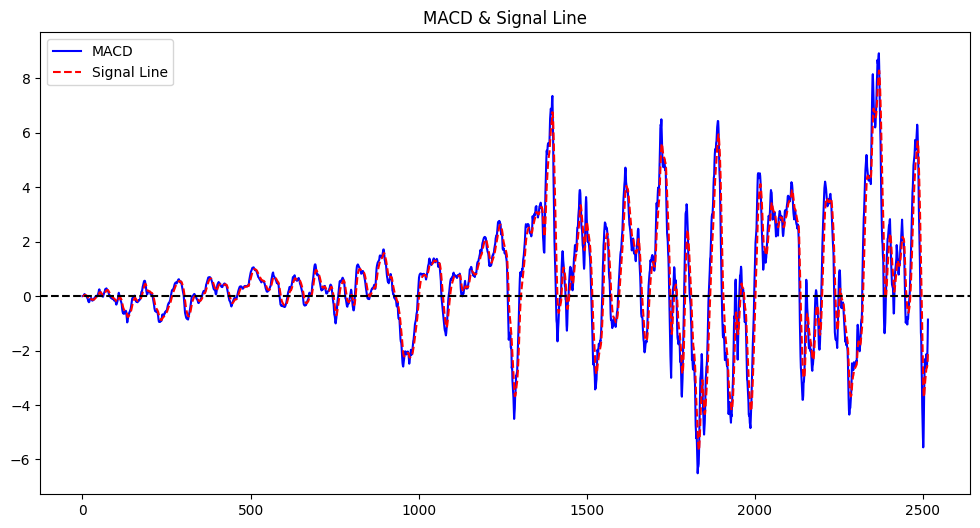

In [60]:
# macd
plt.figure(figsize=(12,6))
plt.plot(stock_data.index, stock_data["MACD"], label="MACD", color='blue')
plt.plot(stock_data.index, stock_data["MACD_signal"], label="Signal Line", color='red', linestyle="dashed")
plt.axhline(0, linestyle="dashed", color="black")
plt.title("MACD & Signal Line")
plt.legend()
plt.show()

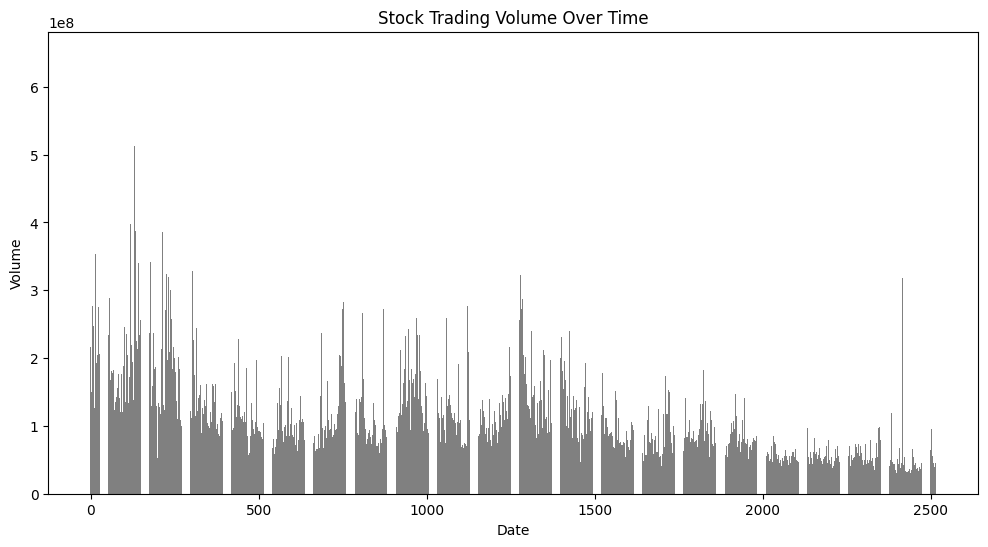

In [61]:
# volume over time
plt.figure(figsize=(12,6))
plt.bar(stock_data.index, stock_data["volume"], color='gray')
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("Stock Trading Volume Over Time")
plt.show()